In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
def standardize(image):
    image = (image- image.mean())/ (np.std(image))
    return image

In [3]:
def cross_corelation(image, filters):
    fig=plt.figure()
    # perform cross_correlation between image and filter
    output = np.zeros(shape=((image.shape[0]-(filters.shape[0])+1),(image.shape[1]-(filters.shape[1])+1))) # this could be the output shape after correlation
    #output = np.zeros(shape=(image.shape[0],image.shape[1]))
    #print("Output shape is ",output.shape)
    #print(filters.shape[0])
    k1= (int)((filters.shape[0]-1)/2) # get the centre row pixel
    rem1= filters.shape[0]-(2*k1) # get the remainder of the pizels which the half of kernel could'nt cover
    #print(k1," ",rem1)
    k2= int((filters.shape[1]-1)/2) # get the centre column pixel
    rem2= filters.shape[1]-(2*k2)
    for i in range(k1,image.shape[0]-k1-1):
        for j in range(k2,image.shape[1]-k2-1):
            image_area= image[i-k1:i+k1+rem1,j-k2:j+k2+rem2]
            image_area= standardize(image_area)
            temp = np.multiply(image_area,filters)
            temp_sum = np.sum(temp)
            output[i-k1,j-k2]=temp_sum
    return output

## Part a) Done for self image

In [4]:
template = Image.open('Data/self_photo.png').convert('L')
image = Image.open('Data/group_photo.png').convert('L')

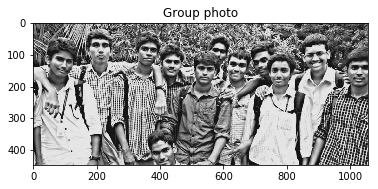

In [5]:
plt.imshow(image,cmap='gray')
plt.title('Group photo')
plt.show()

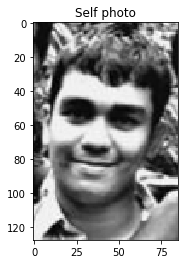

In [6]:
plt.imshow(template,cmap='gray')
plt.title('Self photo')
plt.show()

In [7]:
image = np.asarray(image)
template = np.asarray(template)
print(image.shape," ",template.shape)

(447, 1056)   (128, 85)


In [8]:
imageOut=cross_corelation(image, template)

<Figure size 432x288 with 0 Axes>

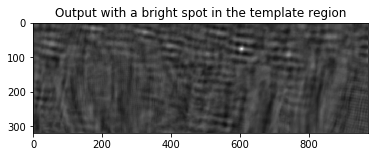

In [9]:
plt.imshow(imageOut,cmap='gray')
plt.title('Output with a bright spot in the template region')
plt.show()

### Reason for peak observed in output:
Cross-correlation is about the measure of similarity between the 2 images.
In this case, when the template is correlated with the image, we get the similarity to be very high( which leads to a bright spot in the image) as the template is already present.  

### Part b) Output obtained for ucuba2 and trailer images

In [10]:
template = Image.open('Data/trailer.png').convert('L')
image = Image.open('Data/u2cuba.jpg').convert('L')

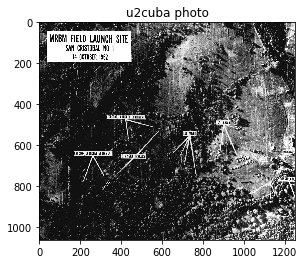

In [11]:
plt.imshow(image,cmap='gray')
plt.title('u2cuba photo')
plt.show()

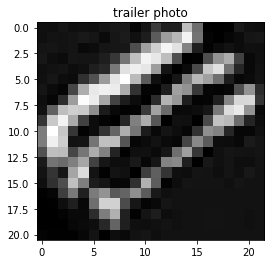

In [12]:
plt.imshow(template,cmap='gray')
plt.title('trailer photo')
plt.show()

In [13]:
image = np.asarray(image)
template = np.asarray(template)
print(image.shape," ",template.shape)

(1063, 1250)   (21, 22)


In [14]:
imageOut=cross_corelation(image, template)

/home/cs18mtech11026/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


<Figure size 432x288 with 0 Axes>

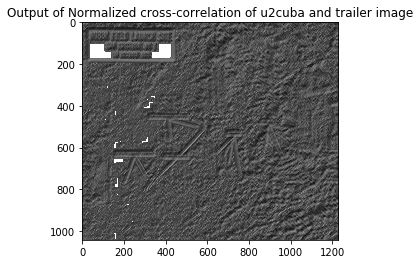

In [15]:
plt.imshow(imageOut,cmap='gray')
plt.title('Output of Normalized cross-correlation of u2cuba and trailer image')
plt.show()

## Reason for straight line artifacts :
Since the template has a black and white part like the input image, the output image is neither black nor white entirely( it grey and almost white). As a result we can see the shapes present in the original image in the output too. We get these white spots when the white regions in the image somewhat match with the white lines of the template. 

### Part c) For a bigger trailer image

In [16]:
template = Image.open('Data/trailerSlightlyBigger.png').convert('L')
image = Image.open('Data/u2cuba.jpg').convert('L')

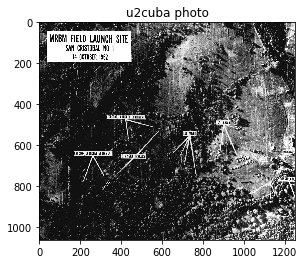

In [17]:
plt.imshow(image,cmap='gray')
plt.title('u2cuba photo')
plt.show()

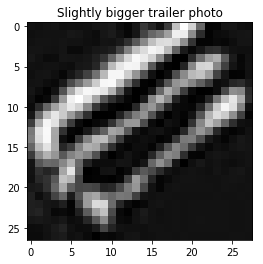

In [18]:
plt.imshow(template,cmap='gray')
plt.title('Slightly bigger trailer photo')
plt.show()

In [19]:
image = np.asarray(image)
template = np.asarray(template)
print(image.shape," ",template.shape)

(1063, 1250)   (27, 28)


In [20]:
imageOut=cross_corelation(image, template)

/home/cs18mtech11026/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


<Figure size 432x288 with 0 Axes>

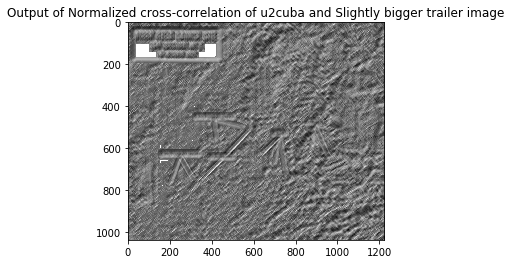

In [21]:
plt.imshow(imageOut,cmap='gray')
plt.title('Output of Normalized cross-correlation of u2cuba and Slightly bigger trailer image')
plt.show()

### How is it different from the previous part?
Since this template is slightly bigger than the previous template, the number of white spots is less than the previous output as most parts of the image wont exactly match with the templates' size.Since it has more white regions in the template,the output looks more grey than the previous output. 
### the limitations of cross-correlation for identifying objects in real-world photos
The major disadvantage is that the template and image must match perfectly/exactly with each other.
When we take a complex filter ( like a filter that is infact a combination of several filters together), cross-correlation takes more time to compute than compared to convolution because in convolution we can pre-compute the filters and apply just one filter to the image rather than in correlation where the order of filters applied matters( Associativity property)

### Part d) 
The answer is : O((n^2)\*(m^2)\*Nr\*Ns)
#### Reason is :
For getting the single pixel in the output we have to perform (m^2) multiplications and (m^2-1) additions. Which is rounded off  to (m^2) operations.
These operations have to be done for the (n-m) rows and columns which is rounded off  to (n^2) operations.
So, for a single filter convolution over an image we get n^2 \* m^2.
This operation is done for the Ns scaling factors and Nr possible roations of the filter.
So, in total it would become, in the  order of (n^2)\*(m^2)\*(Nr)\*(Ns)
